# Laboratorio 2021-22

## Sesión 8A: El algoritmo de Euclides y algunas aplicaciones

____________

**Ejercicio 1** 

**a)** Implementa una función de Sagemath, $\texttt{mcdEuclides}(a,b)$ que, dados $a,b\in \mathbb{N}$ devuelva $\texttt{mcd}(a,b)$. Ten en cuenta que:

- $m.\texttt{mod}(n)$ calcula el resto de la división euclídea de $m$ entre $n$. **Importante**: si $n$ es positivo, este resto puede calcularse también con la instrucción $\texttt{m}$%$\texttt{n}$, pero si $n$ es negativo no, así que mejor que elijas la primera opción.

- $(m-m.\texttt{mod}(n))//n$ calcula el cociente de la división euclídea de $m$ entre $n$. **Importante**: si $n$ es positivo, este resto puede calcularse también con la instrucción $m//n$, pero si $n$ es negativo no, así que mejor que elijas la primera opción.


**Sugerencia**.- Puedes usar dos variables, en las que vayas guardando el dividendo y el divisor de la división euclídea que toca hacer en cada paso, según el algoritmo, y usar una *asignación simultanea* para asignar a dichas variables los nuevos valores que deben tomar en el siguiente paso del algoritmo.

*Observación:* Antes de comenzar este ejercicio deberías haber leído hasta la pregunta 6 del cuestionario.

In [8]:
# Función que dados dos números enteros a y b devuelve el máximo común divisor de éstos.
def mcdEuclides(a, b):
    
    # Bucle en el que hacemos el algoritmo de Euclides
    while True:
        
        # Calculamos el resto euclídeo.
        resto = a.mod(b)
        
        # Vamos cambiando los valores de a y de b.
        a = b
        b = resto

        # Cuando el resto sea cero paramos y a = mcd(a,b)
        if resto == 0:
            return a
        
# Pedimos los valores de a y b que tienen que ser enteros.
a = Integer(input("Introduzca un número entero: "))
b = Integer(input("Introduzca otro número entero: "))
mcd = mcdEuclides(a, b)
print(f"El máximo común divisor de {a} y {b} es {mcd}.")

Introduzca un número entero:  62
Introduzca otro número entero:  28


El máximo común divisor de 62 y 28 es 2.


**b)** Utiliza la función que has creado para calcular $\texttt{mcd}(A,B)$ , donde

A=218642785123568873139682409674715388093959456164487337187488956673379356\
767683911984156651029778394931987024687851492334515679335911782357476206\
14982663417080369812889040177106484729433464665235053699
,

B=119976132398233094388696470435379953144947794792791371742797288237618367\
311805161691611633008753359414644839631837622023142114602546090710321767\
36353643010598584383754146657877123219026579974263168827



In [9]:
#Ejecuta para cargar A y B
A=21864278512356887313968240967471538809395945616448733718748895667337935676768391198415665102977839493198702468785149233451567933591178235747620614982663417080369812889040177106484729433464665235053699
B=11997613239823309438869647043537995314494779479279137174279728823761836731180516169161163300875335941464483963183762202314211460254609071032176736353643010598584383754146657877123219026579974263168827

In [11]:
mcd = mcdEuclides(A, B)
print(f"El máximo común divisor es {mcd}.")

El máximo común divisor es 3310486657195957473932259321797206270953130901534004371235431444680652581523821032990040589463672367.


**c)** Los $𝐴$  y  $𝐵$ del apartado anterior son cada uno de ellos producto de 2 primos de 100 cifras. Este el típo de números que se utilizan como claves en el criptosistema RSA (del que probablemente hablemos en otra sesión más adelante en el curso), cuya seguridad se basa en que es muy difícil factorizar números que son producto de dos primos grandes. Sin embargo, haber encontrado  $\texttt{mcd}(A,B)$  hace muy sencillo factorizar  $𝐴$  y  $𝐵$ . Hazlo.

In [17]:
factor(B//mcdEuclides(A, B))

3624123726263710872963969599867074977006572625605395702725211849509753385206445918340425787075891381

____________

**Ejercicio 2** 

**a)** Implementa una función de Sagemath, $\texttt{Bezout}(a,b)$ que, dados $a,b\in \mathbb{N}$ devuelva $d=\texttt{mcd}(a,b)$ y los dos enteros $x,y$ tales que $ax+by=d$ que se calculan con el algoritmo de Euclides extendido, según el método 1 del documento que has leído previamente.

**Sugerencia**.- Puedes usar dos variables en las que vayas guardando dos valores consecutivos de la lista de $x_i's$ descrita en el método 1 (los valores iniciales de dichas variables están descritos en el método), y usar una *asignación simultanea* para asignar a dichas variables los nuevos valores que deben tomar en el siguiente paso del algoritmo. Lo mismo aplica a los $y's$.

*Observación:* Antes de comenzar este ejercicio deberías haber leído hasta la pregunta 9 del cuestionario.

In [49]:
# Función que devuelve el mcd(a, b) y los x, y tales que ax + by = mcd(a, b)
def Bezout(a, b):
    
    # Primeros valores necesarios para el algoritmo.
    cociente = (a - a.mod(b))//b
    resto = a.mod(b)
    
    a = b
    b = resto
        
    x0 = 0
    x1 = 1
    y0 = 1
    y1 = -cociente
    
    # Bucle en el que hacemos el algoritmo de Euclides
    while resto!=0:
        
        # Calculamos el resto euclídeo.
        cociente = (a - a.mod(b))//b
        resto = a.mod(b)
        
        # Vamos cambiando los valores de a y de b.
        a = b
        b = resto
        
        # Vamos cambiando los valores de x0, x1, y0, y1.
        x0, x1 = x1, x0 - cociente*x1
        y0, y1 = y1, y0 - cociente*y1

    return a, x0, y0
        
# Pedimos los valores de a y b que tienen que ser enteros.
a = Integer(input("Introduzca un número entero: "))
b = Integer(input("Introduzca otro número entero: "))
mcd, x0, y0 = Bezout(a, b)
print(f"El máximo común divisor de {a} y {b} es {mcd}.")
print(f"La identidad de Bezout queda: {a}*{x0} + {b}*{y0} = {mcd}")
print(a*x0+b*y0==mcd) 

Introduzca un número entero:  10
Introduzca otro número entero:  14


El máximo común divisor de 10 y 14 es 2.
La identidad de Bezout queda: 10*3 + 14*-2 = 2
True


**b)** Encuentra $D=\texttt{mcd}(A,B)$ y enteros $X,Y$ tales que $D=AX+BY$ , donde
A=218642785123568873139682409674715388093959456164487337187488956673379356\
767683911984156651029778394931987024687851492334515679335911782357476206\
14982663417080369812889040177106484729433464665235053699, 

B=119976132398233094388696470435379953144947794792791371742797288237618367\
311805161691611633008753359414644839631837622023142114602546090710321767\
36353643010598584383754146657877123219026579974263168827

Comprueba tu resultado.

In [22]:
#Ejecuta para cargar los valores
A=21864278512356887313968240967471538809395945616448733718748895667337935676768391198415665102977839493198702468785149233451567933591178235747620614982663417080369812889040177106484729433464665235053699
B=11997613239823309438869647043537995314494779479279137174279728823761836731180516169161163300875335941464483963183762202314211460254609071032176736353643010598584383754146657877123219026579974263168827


In [24]:
mcd, x0, y0 = Bezout(A, B)
print(A*x0+B*y0==mcd) 

True


____________

**Ejercicio 3** 

**a)** Implementa una función de Sagemath, $\texttt{DiofLin}(a,b,c)$ que, dados $a,b,c\in\mathbb Z$, nos proporcione la solución particular de la ecuación diofántica lineal $ax+by=c$ que se consigue con el método 2 del documento que has leído en la actividad previa en caso de que la ecuación tenga solución. Si la ecuación no tiene solución, el programa debe avisarnos.

*Observación:* Antes de comenzar este ejercicio deberías haber leído hasta la pregunta 11 del cuestionario.

In [56]:
# Función que proporciona la solución particular de la ecuación diofántica lineal ax + by = c
def DiofLin(a, b, c):
    
    # Algoritmo de Euclides para encontrar mdc(a, b) = d.
    d = mcdEuclides(a, b)
    
    # En caso de que no tenga solución.
    if c%d!=0:
        print('La ecuación no tiene solución')
        return None, None
    
    # Variables prima del método dos para encontrar la solución particular.
    a_prima = a//d
    b_prima = b//d
    c_prima = c//d
    
    # La nueva ecuación a resolver queda a'x' + b'y' = 1
    # Usamos bezout para resolverla y sacar x' e y'
    mcd, x, y = Bezout(a_prima, b_prima)

    # Ahora la solución particular es x0 = x'c'; y0 = y'c'
    x0 = x*c_prima
    y0 = y*c_prima
    
    return x0, y0


# Pedimos los valores de a, b y c que tienen que ser enteros.
a = Integer(input("Introduzca un número entero: "))
b = Integer(input("Introduzca otro número entero: "))
c = Integer(input("Introduzca otro número entero: ")) 
print()
print(f"Resolviendo {a}x + {b}y = {c}")
print()
x, y = DiofLin(a, b, c)
print(f"x = {x}")
print(f"y = {y}")

Introduzca un número entero:  10
Introduzca otro número entero:  14
Introduzca otro número entero:  22



Resolviendo 10x + 14y = 22

x = 33
y = -22


**b)** Utiliza la función del apartado anterior para encontrar una solución, o para comprobar que no existen soluciones, de las ecuaciones
$$10x+36y=28, \qquad 10x+28y=28 \qquad Ax+By=C, $$
donde $A, B$ son los enteros de los dos ejercicios anteriores y $$C=6620973314391914947864518643594412541906261803068008742470862889361305163047642065980081178927344734.$$

Comprueba que tus resultados son correctos.

In [45]:
#Ejecuta para cargar los valores
A=21864278512356887313968240967471538809395945616448733718748895667337935676768391198415665102977839493198702468785149233451567933591178235747620614982663417080369812889040177106484729433464665235053699
B=11997613239823309438869647043537995314494779479279137174279728823761836731180516169161163300875335941464483963183762202314211460254609071032176736353643010598584383754146657877123219026579974263168827
C=6620973314391914947864518643594412541906261803068008742470862889361305163047642065980081178927344734


In [58]:
# Comprobaciones
print(DiofLin(10,36,28))

print(DiofLin(10,28,28))

print(DiofLin(A,B,C))

(-98, 28)
(42, -14)
(-1194003939011573893674422698406046984435701194728063571845067161366453127037005564530833349382556434, 2175935675334763979846848763680013769719907647252449217709088457511724586507728362586053906854898300)


____________

**Ejercicio 4** 

El método 3 del texto que has leído en el cuestionario de la actividad previa muestra cómo pueden describirse todas las soluciones de una ecuación diofántica lineal. 

**a)** Implementa una función de Sagemath, $\texttt{DiofLinGrande}(a,b,c, N)$ que, dados $a,b,c$ y un natural $N\ge0$ , encuentre la solución de $ax+by=c$ con $x\ge N$  para la que $x$ es lo menor posible (es decir, que si $(x,y)$ es la solución que buscamos y $(x',y')$ es otra solución con $x'\ge N$, entonces $x'>x\ge N$).

Comprueba tu resultado para la ecuación  $10x+36y=28$  y  $N=100,110,120,-80,-90,$ y $−100$  (para entender las soluciones conviene preguntarse cuánto vale el paso $b/d$  en la expresión $x=x_0+\frac{b}{d}n$ que hemos visto para las soluciones).

*Observaciones:* 

- Antes de comenzar este ejercicio deberías haber leído completamente el cuestionario.

- Puedes suponer que $b\not=0$, ya que en otro caso todas las soluciones (si existe alguna) tienen la misma $x=\frac ca$, que es entera porque, si existe soluci&oacute;n, &nbsp;$\text{mcd}(a,0)=a \mid c$.</p>

*Sugerencias:*

- En este ejercicio vas a tener que trabajar con inecuaciones. Conviene distinguir los casos $\frac bd >0$ y $\frac bd <0$.

- Pueden resultar útiles las funciones $\texttt{floor}$  y $\texttt{ceil}$.

In [59]:
#OJO AL SIGNO DE b/d
def DiofLinGrande(a,b,c,N):
    d,X,Y=Bezout(a,b)
    if c%d!=0:
        print('La ecuación %dx+%dy=%d no tiene solución.'%(a,b,c))
        return None,None
    if b/d>0:
        m=ceil((N*d-X*c)/b)
    else:
        m=floor((N*d-X*c)/b)
    xx=(X*c//d)+(m*b//d)
    yy=(Y*c//d)-(m*a//d)
    return xx,yy

[DiofLinGrande(10,36,28,M) for M in [100,110,120,-80,-90,-100]]

[(100, -27), (118, -32), (136, -37), (-80, 23), (-80, 23), (-98, 28)]

**b)** Escribe un programa que, dados $a,b,c$ y $N\ge 0$, nos dibuje con el comando $\texttt{points}$ todas los soluciones $(x,y)$ de la ecuación $ax+by=c$ que tengan $-N\le x \le N$.

(-188, 53) (190, -52)


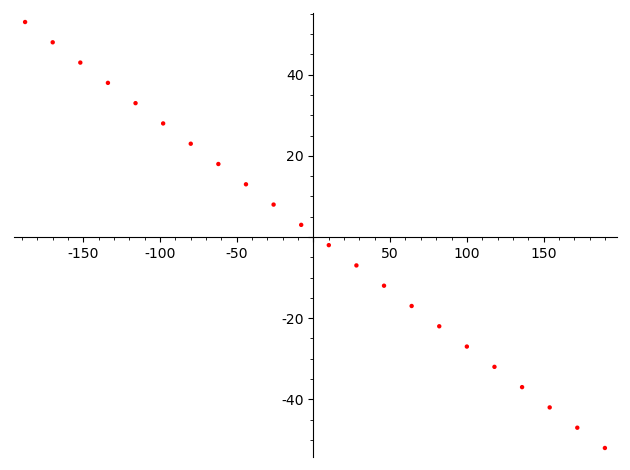

In [60]:
#OJO AL SIGNO DE b/d
def DiofLinIntervalo(a,b,c,N):
    d,u,v=Bezout(a,b)
    if c%d!=0:
        return 'La ecuación no tiene solución'
    if b/d>0:
        ninicial=ceil((-N*d-u*c)/b)
        nfinal=floor((N*d-u*c)/b)
    else:
        ninicial=ceil(-(-N*d-u*c)/b)
        nfinal=floor(-(N*d-u*c)/b)
    L=[]
    for j in [ninicial..nfinal]:
        L.append(((u*c//d)+(j*b//d),(v*c//d)-(j*a//d)))
    print(L[0], L[-1]) #PARA COMPROBAR QUE LLEGA A LOS LÍMITES INDICADOS
    return points(L,color='red')

#EL EJEMPLO QUE QUEREMOS
DiofLinIntervalo(10,36,28,200)